# Analyse des données du cancer de sein (Wisconsin Cancer)

## Partie I - Préparation des données et investigations

In [3]:
# import modules 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Récupération des données 


In [11]:
cancer = pd.read_csv('data/data.csv',sep=",")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
# On a pas besoin des colonnes 'id' et 'unamed' donc on les enlève 

cancer = cancer.drop(columns=['id','Unnamed: 32'])

cancer = cancer.rename(columns={'concave points_worst':'concave_points_worst', 
                                'concave points_mean':'concave_points_mean', 
                                'concave points_se':'concave_points_se'}) # remplacer ' ' par '_' 

cancer_cleaned = cancer.to_csv("data/cleaned_data.csv")

### Description des données 
   Informations générales sur notre dataset 'cancer'

In [8]:
features = cancer.shape[1]-1

# Taille de l'échantillon 

taille = len(cancer)

# Nombre de cas M/B

malign = len(cancer[cancer['diagnosis'] == 'M']['diagnosis'])
benign = len(cancer[cancer['diagnosis'] == 'B']['diagnosis'])
taux_malign = round(((float(malign)/taille))*100,2)

print(str(taille) + " cas dans cet échantillon.")
print(str(features) + " features dans cet échantillon.")
print(str(malign) + " cas identifiés de type malign.")
print(str(benign) + " cas identifiés de type benign")
print("Soit " + str(taux_malign) + "% de cas de malign et " + str(100.0-taux_malign) + "% de cas de benign.")


569 cas dans cet échantillon.
32 features dans cet échantillon.
212 cas identifiés de type malign.
357 cas identifiés de type benign
Soit 37.26% de cas de malign et 62.74% de cas de benign.


### Corrélation des variables

#### Corrélation avec la Heatmap

On a beaucoup de features (30 sans 'diagnosis') donc il faut essayer de trouver des corrélations, et essayer de diminuer ce nombre. Des techniques connues sont l'utilisation de la méthode Wrapper pour la sélection de features, puis faire l'intersection avec Feature Importance et Lasso (techniques avancées).

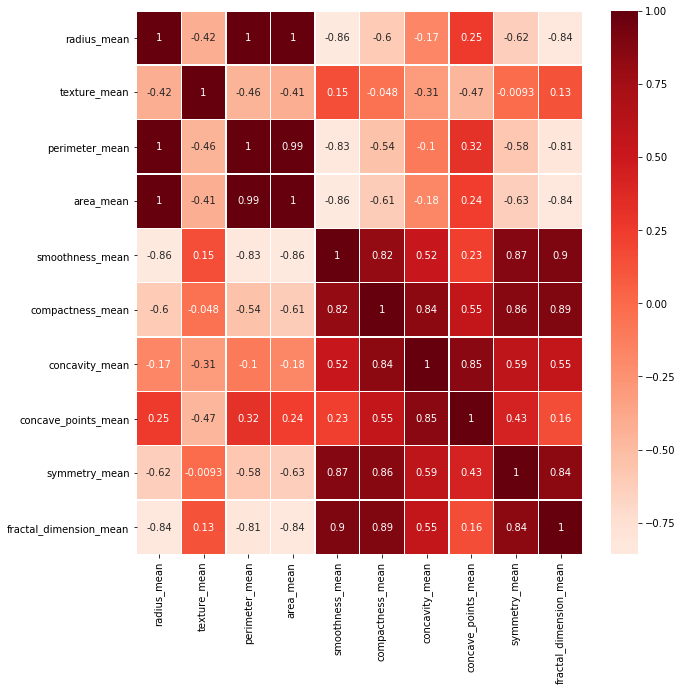

In [91]:
# load seaborn lib
import seaborn as sns

# On prend le top 10 des colonnes

cancer_top10 = cancer.head(10)
plt.figure(figsize=(10,10))
sns.heatmap(cancer_top10[list(cancer_top10.columns[1:11])].corr(), 
            annot=True,
            linewidths=.4,
            center=0,
            cmap="Reds")
plt.show()

Grâce à la heatmap, tous les carrés rouges (plus ou moins foncés) représentent une corrélation fortes entre deux variables.
On a plusieurs exemples : 'area_mean' et 'perimeter_mean'

#### Corrélation entre Compactness_mean & smoothness_mean ?

* On remarque une corrélation entre les variables 'campactness_mean' et 'smoothness_mean' (0.83), comparons les données de ces deux variables pour les cellules malign et benign.

On s'intéresse ici à la moyenne, ainsi qu'à la médianne.




In [63]:
cancer.groupby('diagnosis')['compactness_mean'].mean()

diagnosis
B    0.080085
M    0.145188
Name: compactness_mean, dtype: float64

In [57]:
cancer.groupby('diagnosis')['compactness_mean'].median()


diagnosis
B    0.07529
M    0.13235
Name: compactness_mean, dtype: float64

In [58]:
cancer.groupby('diagnosis')['perimeter_mean'].mean()


diagnosis
B     78.075406
M    115.365377
Name: perimeter_mean, dtype: float64

In [59]:
cancer.groupby('diagnosis')['perimeter_mean'].median()


diagnosis
B     78.18
M    114.20
Name: perimeter_mean, dtype: float64

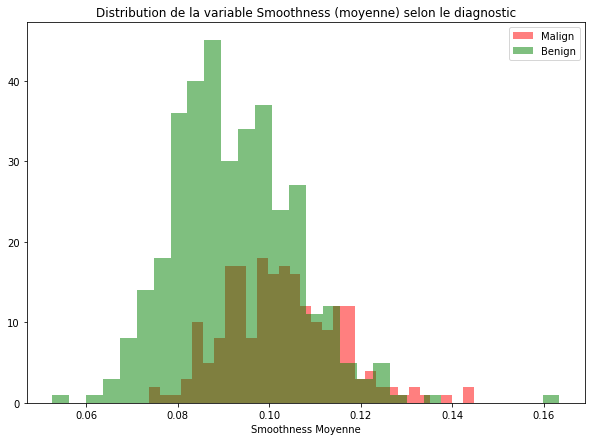

In [93]:


plt.figure(figsize=(10,7))
plt.hist(cancer[cancer['diagnosis']== 'M']['smoothness_mean'], bins=30, color='r',alpha = 0.5, label='Malign')
plt.hist(cancer[cancer['diagnosis']== 'B']['smoothness_mean'], bins=30, color='g',alpha = 0.5, label='Benign')
plt.xlabel('Smoothness Moyenne')
plt.legend()
plt.title('Distribution de la variable Smoothness (moyenne) selon le diagnostic');

L'histograme ci-desssus montre que les deux variables smoothness et compactness sont de bons indicateurs sur le diagnostic des cellules malignes.
